In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
day_2 = pd.read_csv("prices_round_1_day_-2.csv", sep = ";")
day_1 = pd.read_csv("prices_round_1_day_-1.csv", sep = ";")
day_0 = pd.read_csv("prices_round_1_day_0.csv", sep = ";")

In [87]:
day_2_trade = pd.read_csv("trades_round_1_day_-2_nn.csv", sep = ";")
day_1_trade = pd.read_csv("trades_round_1_day_-1_nn.csv", sep = ";")
day_0_trade = pd.read_csv("trades_round_1_day_0_nn.csv", sep = ";")

In [88]:
day_0_trade = day_0_trade.set_index(['timestamp'])

In [89]:
day_2

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
1,-2,0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.000000
2,-2,100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
3,-2,100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.000000
4,-2,200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2,999700,PEARLS,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,640.000000
19996,-2,999800,BANANAS,4946,26,NaN,NaN,NaN,NaN,4950,9,4952.0,26.0,NaN,NaN,4948.0,213364.000000
19997,-2,999800,PEARLS,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,9.0,10004.0,1.0,9997.0,640.000000
19998,-2,999900,PEARLS,9996,2,9995.0,30.0,NaN,NaN,10004,2,10005.0,30.0,NaN,NaN,10000.0,640.000000


In [90]:
#DataGrabber
df = day_2
df = df.set_index('timestamp')

In [91]:
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-2,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
0,-2,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.000000
100,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
100,-2,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.000000
200,-2,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.000000


In [92]:

df = df[(df['product']=='BANANAS')]
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-2,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
100,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
200,-2,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621
300,-2,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762
400,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781


In [93]:
#moving average
def SMA(data, period = 30, column = 'mid_price'):
    return data[column].rolling(window=period).mean()

In [94]:
df['SMA'] = SMA(df, 100)
df['Simple_Returns'] = df.mid_price.pct_change(1)
df['Log_Returns'] = np.log(1+df['Simple_Returns'])

#if mid_price == SMA --> ratio will be equal to 1
#if mid_price <SMA --> ratio < 1
#if mid_price >SMA --> ratio > 1
df['Ratios'] = df['mid_price']/df['SMA'] 

#show th data

In [95]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,SMA,Simple_Returns,Log_Returns,Ratios
timestamp,,,,,,,,,,,,,,,,,,,,
0,-2,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000,NaN,NaN,NaN,NaN
100,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281,NaN,-0.000500,-0.000500,NaN
200,-2,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621,NaN,0.000600,0.000600,NaN
300,-2,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762,NaN,0.000000,0.000000,NaN
400,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781,NaN,-0.000200,-0.000200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,-2,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,26,NaN,NaN,NaN,NaN,4947.5,223680.000000,4947.960,-0.000707,-0.000707,0.999907
999600,-2,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,219260.000000,4947.985,0.000303,0.000303,1.000205
999700,-2,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,22,NaN,NaN,NaN,NaN,4948.5,214296.000000,4947.995,-0.000101,-0.000101,1.000102


In [96]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,SMA,Simple_Returns,Log_Returns,Ratios
timestamp,,,,,,,,,,,,,,,,,,,,
0,-2,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000,NaN,NaN,NaN,NaN
100,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281,NaN,-0.000500,-0.000500,NaN
200,-2,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621,NaN,0.000600,0.000600,NaN
300,-2,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762,NaN,0.000000,0.000000,NaN
400,-2,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781,NaN,-0.000200,-0.000200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,-2,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,26,NaN,NaN,NaN,NaN,4947.5,223680.000000,4947.960,-0.000707,-0.000707,0.999907
999600,-2,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,219260.000000,4947.985,0.000303,0.000303,1.000205
999700,-2,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,22,NaN,NaN,NaN,NaN,4948.5,214296.000000,4947.995,-0.000101,-0.000101,1.000102


In [97]:
#statistics on the ratio column
df['Ratios'].describe()

count    9901.000000
mean        0.999950
std         0.000501
min         0.998045
25%         0.999617
50%         0.999936
75%         1.000293
max         1.002129
Name: Ratios, dtype: float64

In [98]:
#Get and show the percentiles values
percentiles = [15, 20, 50, 80, 85]
#Remove NAN values in the ratios column and store result in new variable
ratios = df['Ratios'].dropna()
#Get the values of the percentiles
percentile_values = np.percentile(ratios, percentiles)
#Show the value of the percentiles
percentile_values

array([0.99943073, 0.9995308 , 0.9999358 , 1.0003736 , 1.00047714])

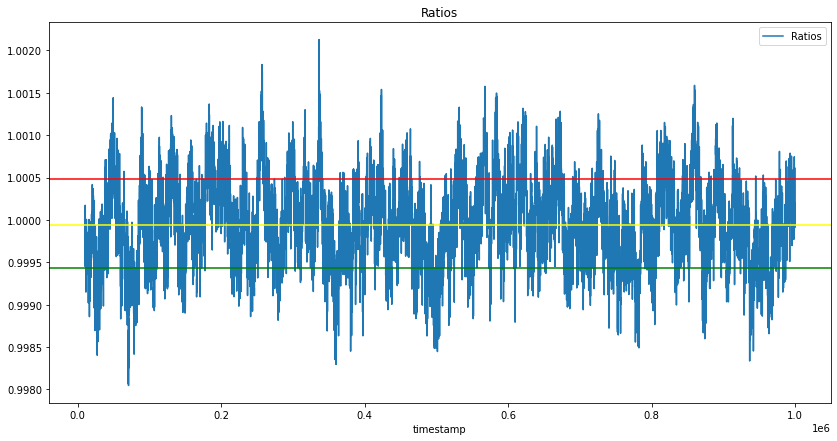

In [101]:
#plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)

plt.axhline(percentile_values[0], c='green', label='15 Percentile')
plt.axhline(percentile_values[2], c='yellow', label='50 Percentile')
plt.axhline(percentile_values[-1], c='red', label='85 Percentile')

- Anytime the ratio is below the green line buy the bananas
- Anytime above red buy the asset

In [102]:
#Create buy and sell signals 
sell = percentile_values[-1] #85th percentile for selling 
buy  = percentile_values[0] # 15th percentile threshold where we wish to buy

#put -1 where ratio > percentile to sell and nan otherwise 
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)

#put 1 whhere the ratio < percentile to buy current value otherwise 
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])

#ffill missing values
df['Positions'] = df['Positions'].ffill()

#Get the buy and sell signals
df['Buy'] = np.where(df.Positions == 1, df['mid_price'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['mid_price'], np.nan)


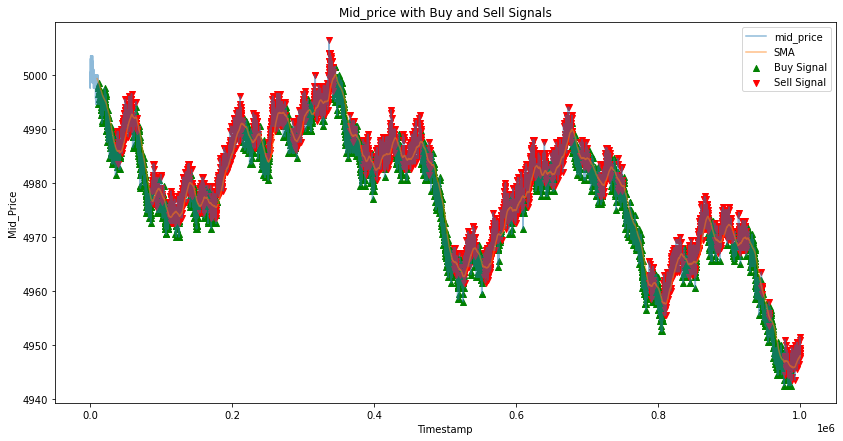

In [104]:
#visualize the buy and sell signals along with the mid_price 

plt.figure(figsize=(14,7))
plt.title('Mid_price with Buy and Sell Signals')
plt.plot(df['mid_price'], alpha=0.5, label='mid_price')
plt.plot(df['SMA'], alpha=0.5, label='SMA')
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker = '^',  alpha=1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker = 'v',  alpha=1)
plt.xlabel('Timestamp')
plt.ylabel('Mid_Price')
plt.legend()
plt.show()

In [106]:
#Calculate the returns for the mean reversion strategy
df['Strategy_Returns'] = df.Positions.shift(1)*df.Log_Returns
df['Strategy_Returns']

timestamp
0              NaN
100            NaN
200            NaN
300            NaN
400            NaN
            ...   
999500    0.000707
999600   -0.000303
999700    0.000101
999800    0.000101
999900   -0.000101
Name: Strategy_Returns, Length: 10000, dtype: float64

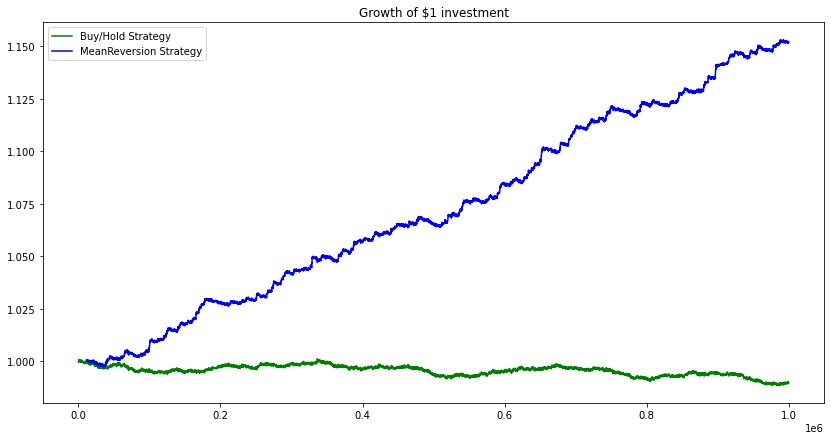

In [107]:
plt.figure(figsize=(14,7))
plt.title('Growth of $1 investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green',label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue',label='MeanReversion Strategy')
plt.legend()

In [111]:
df.tail()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,mid_price,profit_and_loss,SMA,Simple_Returns,Log_Returns,Ratios,Positions,Buy,Sell,Strategy_Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
999500,-2,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,26,...,4947.5,223680.0,4947.960,-0.000707,-0.000707,0.999907,-1.0,NaN,4947.5,0.000707
999600,-2,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,30,...,4949.0,219260.0,4947.985,0.000303,0.000303,1.000205,-1.0,NaN,4949.0,-0.000303
999700,-2,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,22,...,4948.5,214296.0,4947.995,-0.000101,-0.000101,1.000102,-1.0,NaN,4948.5,0.000101
999800,-2,BANANAS,4946,26,NaN,NaN,NaN,NaN,4950,9,...,4948.0,213364.0,4947.995,-0.000101,-0.000101,1.000001,-1.0,NaN,4948.0,0.000101
999900,-2,BANANAS,4945,32,NaN,NaN,NaN,NaN,4952,32,...,4948.5,215764.0,4948.000,0.000101,0.000101,1.000101,-1.0,NaN,4948.5,-0.000101
